# Tarea semanal 10
## Nicolás Albano 
### Consignas

Síntesis de funciones de excitación

1) Sea la función:

Z(s)=(s2+3)(s2+1)s(s2+2)

Se pide hallar la topología circuital y los valores de los componentes para:

a) Síntesis de Z(s)

mediante el método de Foster en su versión  "paralelo" o "derivación".

b) Idem a) mediante Cauer 1 y 2.

2) Sea 

Y(s)=3s(s2+7/3)(s2+2)(s2+5)

Obtenga los valores de los componentes de la siguiente red sabiendo que L2 y C2 resuenan a 1 r/s.

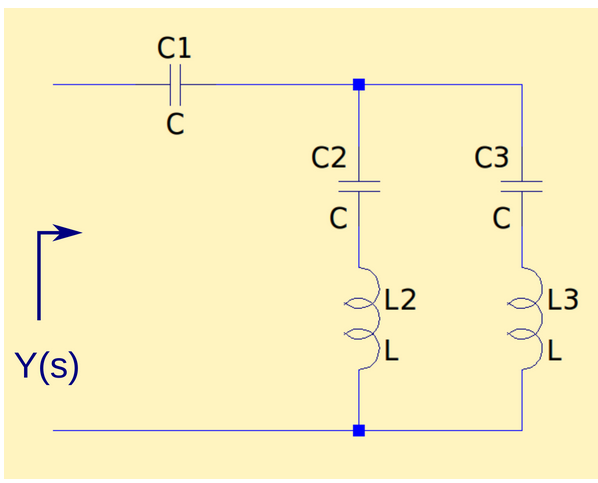


### Resolucion en papel de ambos ejercicios

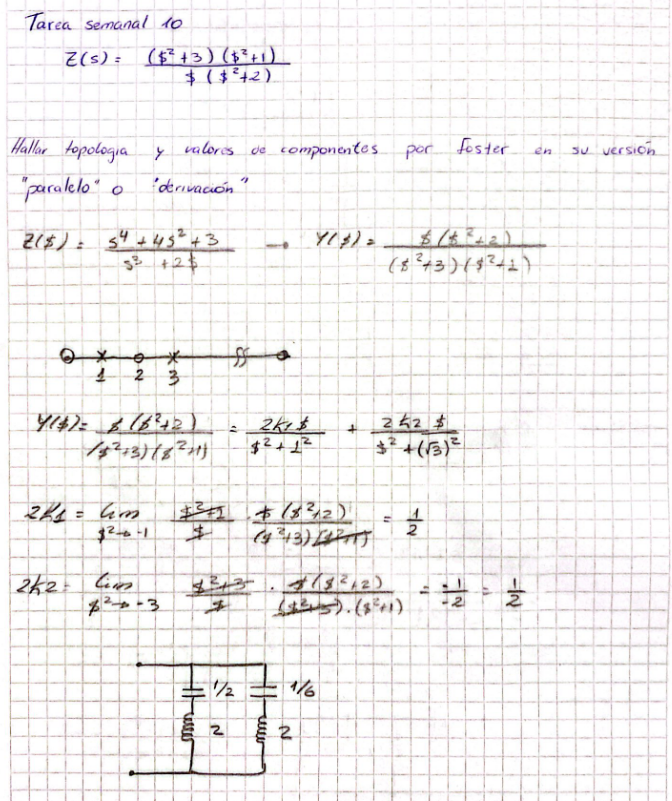

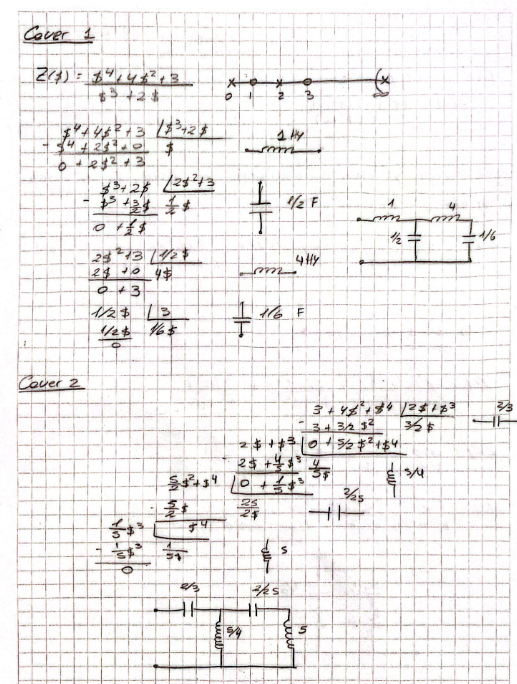

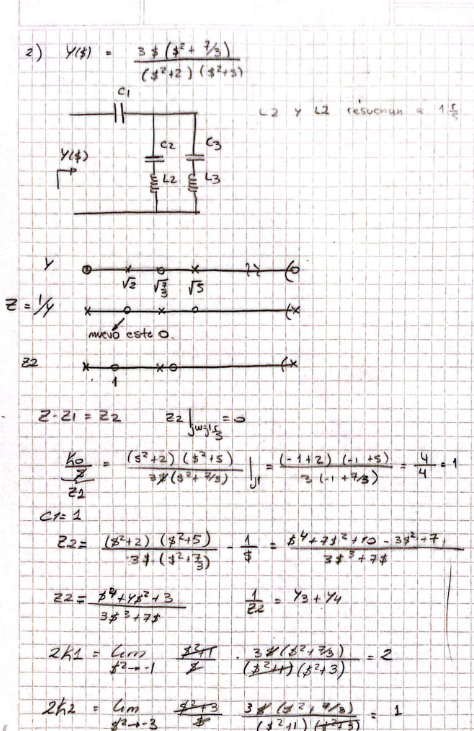

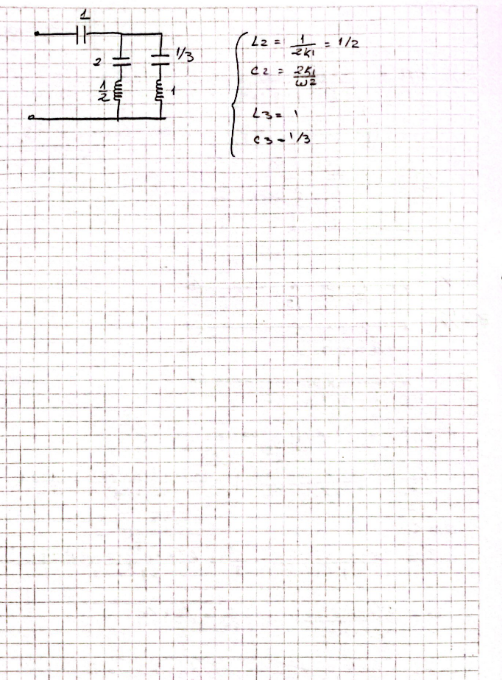

### Simulacion circuital 

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Foster derivación

<IPython.core.display.Math object>

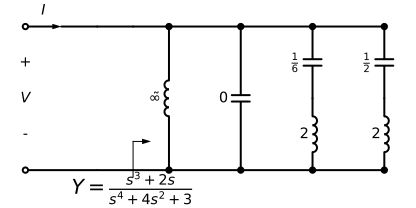

In [4]:
import sympy as sp

from pytc2.sintesis_dipolo import foster
from pytc2.dibujar import dibujar_foster_serie, dibujar_foster_derivacion
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s

s = sp.symbols('s ', complex=True)

# Defino Y
Y = (s**3 + 2*s) / (s**4 + 4*s**2 + 3)

print_latex(a_equal_b_latex_s('Y(s)', Y))

# Calculo los residuos 
k0, koo, ki_wi, _ , Y_foster = foster(Y)

print_latex(a_equal_b_latex_s('k_0', k0))

print_latex(a_equal_b_latex_s(r'k_1 = \left[ \frac{1}{ \frac{1}{s. \frac{\omega_i^2}{2.k_i} } + s . \frac{1}{2.k_i} } \right]  = \
                                             \left[ \frac{1}{ \frac{k_0}{s} + s . k_\infty } \right] = \
                                             \left[ k_0, k_\infty \right] = \
                                       \left[ \
                                             \left[ \frac{\omega_1^2}{2k_1}, \frac{1}{2k_1} \right] \
                                       \right]', ki_wi ))

print_latex(a_equal_b_latex_s('k_\infty', koo))


print_latex(a_equal_b_latex_s(a_equal_b_latex_s('Y(s)', Y)[1:-1], Y_foster ))

print_subtitle('Foster derivación')

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('Y(s)', Y)[1:-1], Y_foster ))

# Tratamos a nuestra función imitancia como una Y
dibujar_foster_derivacion(k0, koo, ki_wi, y_exc = Y)


#### Cauer 1

<IPython.core.display.Math object>

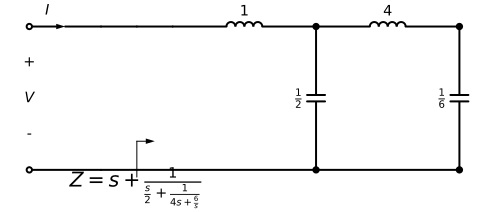

In [5]:
from pytc2.sintesis_dipolo import cauer_LC
from pytc2.dibujar import dibujar_cauer_LC


# Defino Z

Z = (s**4 + 4*s**2 + 3)/(s**3 + 2*s)

print_subtitle('Cauer 1')

koo, Z_cauer_oo, rem = cauer_LC(Z, remover_en_inf=True)

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('Z(s)', Z)[1:-1], Z_cauer_oo ))

dibujar_cauer_LC(koo, z_exc = Z_cauer_oo)

#### Cauer 2

<IPython.core.display.Math object>

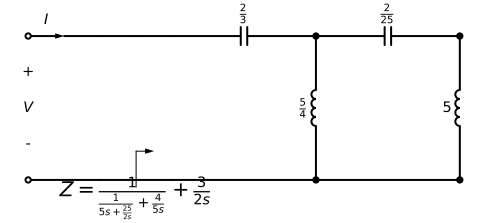

In [6]:

k0, Z_cauer_0, rem = cauer_LC(Z, remover_en_inf=False)

print_subtitle('Cauer 2')

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('Z(s)', Z)[1:-1], Z_cauer_0 ))

dibujar_cauer_LC(k0, z_exc = Z_cauer_0)


### Punto 2

In [11]:
from pytc2.remociones import remover_polo_dc, remover_polo_jw
from pytc2.dibujar import display, dibujar_puerto_entrada, dibujar_funcion_exc_abajo,  dibujar_elemento_serie, dibujar_tanque_derivacion, dibujar_espacio_derivacion
from IPython.display import display,  Markdown

# Sea la siguiente función de excitación
Y = 3*s*(s**2+sp.Rational(7,3))/(s**2+2)/(s**2+5)
num, den = Y.as_numer_denom()

omega_L2C2 = 1

Z2, Zc1 = remover_polo_dc(1/Y, omega_zero = omega_L2C2 )
C1 = 1/(s*Zc1)

print_latex(a_equal_b_latex_s('Z_1(s) = \\frac{k^p_0}{s}', Zc1))
print_latex(a_equal_b_latex_s('Z_2(s)', Z2))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [15]:
Y4, Yt2, L2, C2 = remover_polo_jw(1/Z2, isImpedance = False, omega = omega_L2C2 )

print_latex(a_equal_b_latex_s('Y_3(s)', Yt2))
print_latex(a_equal_b_latex_s('Y_4(s)', Y4))

Y6, Yt3, L3, C3 = remover_polo_jw(Y4, isImpedance = False)

print_latex(a_equal_b_latex_s('Y_5(s)', Yt3))
print_latex(a_equal_b_latex_s('Y_6(s)', Y6))

display(L2,C2,L3,C3)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

1/2

2

1

1/3